# <span style="color:red">@@@@@@@@@@@@ Ayad @@@@@@@@@@@@</span>

In [1]:
data_source_url = "https://raw.githubusercontent.com/kolaveridi/kaggle-Twitter-US-Airline-Sentiment-/master/Tweets.csv"


import pandas as pd
airline_tweets = pd.read_csv(data_source_url)

In [2]:
airline_tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


<AxesSubplot:ylabel='airline_sentiment'>

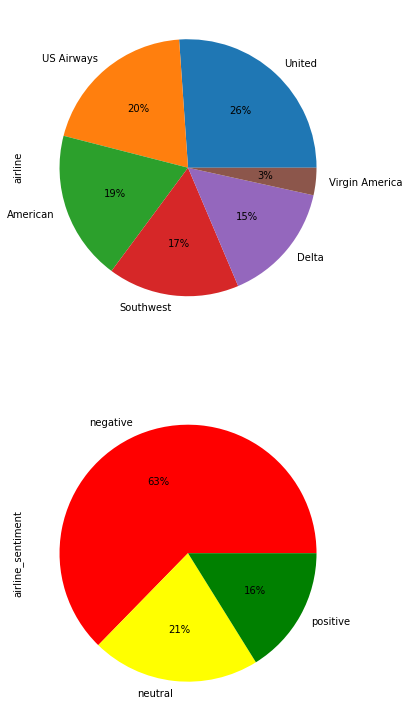

In [44]:
import matplotlib.pyplot as plt

plt.subplot(211)
airline_tweets.airline.value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(13,13))

plt.subplot(212)
airline_tweets.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(13,13),
                                                     colors=["red", "yellow", "green"])


<AxesSubplot:xlabel='airline'>

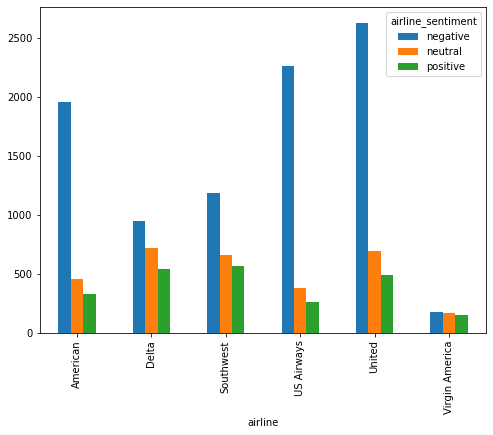

In [41]:
airline_sentiment = airline_tweets.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()

airline_sentiment.plot(kind='bar', figsize=(8,6))

<AxesSubplot:xlabel='airline_sentiment', ylabel='airline_sentiment_confidence'>

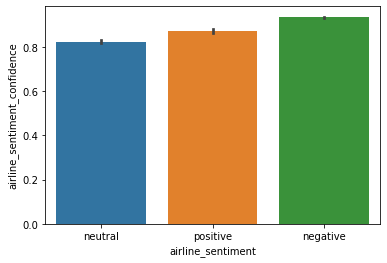

In [45]:
import seaborn as sns

sns.barplot(x='airline_sentiment', y='airline_sentiment_confidence' , data=airline_tweets)

In [52]:
X = airline_tweets['text'].values
y = airline_tweets['airline_sentiment'].values

In [54]:
import re


processed_features = []

for sentence in range(0, len(X)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(X[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature)#, flags=re.I

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

vectorizer = TfidfVectorizer (stop_words=stopwords.words('english'))# max_features=2500, min_df=7, max_df=0.8,


processed_features = vectorizer.fit_transform(processed_features).toarray()

In [57]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(processed_features, y, 
                                                    test_size=0.2, random_state=33)

In [58]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [59]:
predictions = text_classifier.predict(X_test)


In [60]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [61]:
print(confusion_matrix(y_test,predictions))

[[1754   78   27]
 [ 376  191   42]
 [ 172   51  237]]


In [62]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    negative       0.76      0.94      0.84      1859
     neutral       0.60      0.31      0.41       609
    positive       0.77      0.52      0.62       460

    accuracy                           0.75      2928
   macro avg       0.71      0.59      0.62      2928
weighted avg       0.73      0.75      0.72      2928



In [63]:
print(accuracy_score(y_test, predictions))

0.7452185792349727


# <span style="color:red">@@@@@@@@@@@@ Ayad @@@@@@@@@@@@</span>